<a href="https://colab.research.google.com/github/ghisford/Machine_learning/blob/main/classification_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame= False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
X, y = mnist.data, mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
X.shape

(70000, 784)

In [4]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [5]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
  image = image_data.reshape(28,28)
  plt.imshow(image,cmap= "binary")
  plt.axis("off")

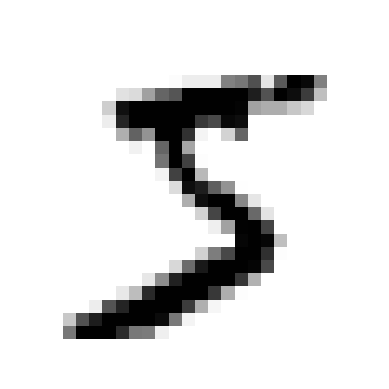

In [6]:
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [7]:
# proof that its a 5
y[0]

'5'

### Shuffling data is important

In [8]:
# the data is already properly shuffled to create test and validation sets
X_train, X_test, y_train, y_test = X[:60000],X[60000:], y[:60000], X[60000]

### Training a binary classifier Using an sgdClassifier

In [9]:
y_train_5 = (y_train== '5')
y_test_5 = (y_test == '5')

<ipython-input-9-0323413c7085>:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  y_test_5 = (y_test == '5')


In [10]:
from sklearn.linear_model import SGDClassifier


sgd_clf = SGDClassifier(random_state= 42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [11]:
# remember some_digit was a 5
sgd_clf.predict([some_digit])

array([ True])

### Evaluating Performance

using cross validation

In [12]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train, y_train_5, cv=3, scoring= "accuracy")

array([0.95035, 0.96035, 0.9604 ])

### Using a dummy classifier for the negative classes

In [13]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)


DummyClassifier()

In [14]:
# false means no 5s detected
print(any(dummy_clf.predict(X_train)))

False


In [15]:
# lets get the models accuracy
cross_val_score(dummy_clf, X_train, y_train_5, cv= 3, scoring= "accuracy")

array([0.90965, 0.90965, 0.90965])

### Confusion Matrices

In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv= 3)

In [17]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [19]:
# illustrating how a perfect confusion matrix would look like
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

### Precision = TP /( TP + FP)
Out of all the positive predictions, what percentage is correct
How many wrong values can we tolerate

In [20]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

### Recall = TP/ ( TP + FN)
Out of all the positive instances. How many does the classifier put in the correct class?
How many correct predictions do we want?

In [21]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

### F1 score: Combining precision and recall
calculates the harmonic mean giving weight to the smaller values

In [22]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

### Threshold

In [23]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [24]:
threshold= 0
y_some_digit_pred = (y_scores> threshold)

## Raising the threshold

In [25]:
threshold = 3000
y_some_digit_pred= (y_scores> threshold)
y_some_digit_pred

array([False])

### Deciding which threshold value to use
Return decision scores from the cross_val_predict function instead of predictions

In [26]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv= 3, method= "decision_function")

We use these scores to compute the precision and recall for all possible thresholds, using the Precision_recall_curve() function

In [27]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [28]:
thresholds

array([-146348.56726174, -142300.00705404, -137588.97581744, ...,
         38871.26391927,   42216.05562787,   49441.43765905])

using matplotlib to plot precision, recall as functions of the threshold value.

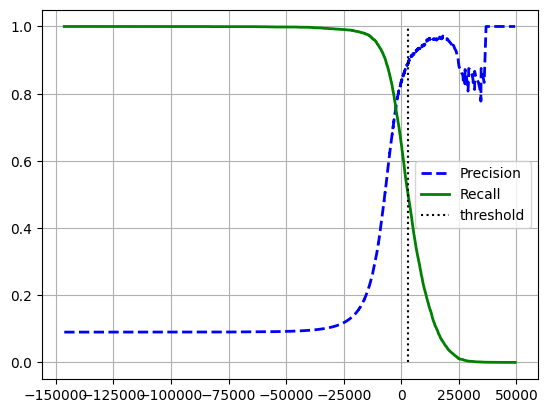

In [29]:
plt.plot(thresholds, precisions[:-1],"b--", label= "Precision", linewidth= 2)
plt.plot(thresholds, recalls[:-1], "g-", label= "Recall", linewidth= 2)
plt.vlines(threshold, 0,1.0,"k","dotted", label= "threshold")
plt.xlabel
plt.legend()
plt.grid()
plt.show()

### plotting precision directly against recall

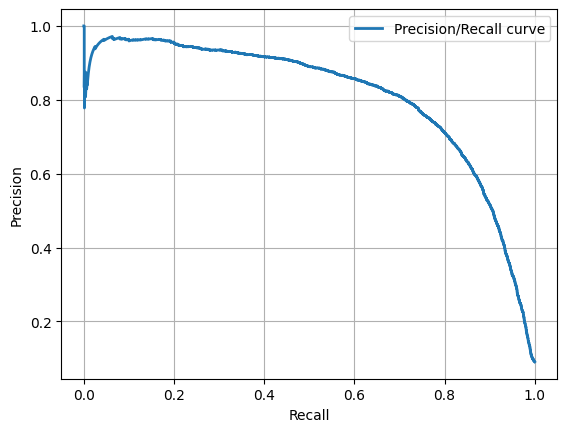

In [30]:
plt.plot(recalls, precisions, linewidth=2, label= "Precision/Recall curve")
plt.grid()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

## Calculating the perfect threshold using a set precision

In [33]:
idx_for_90_precision = (precisions>= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

How to make predictions instead of calling the classifier's predict() method

In [34]:
y_train_pred_90 = (y_scores>= threshold_for_90_precision)
# checking the predictions precision and recall

precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [35]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

## The ROC curve
1. Plots the false positive rate against the false positive rate
2. roc = sensitivity/(1 - specificity)

## How to calculate it
1. use the roc_curve function to calculate the TPR and FPR values for various thresholds
2. The you can plot TPR against FPR  using matplotlib

In [37]:
from sklearn.metrics import roc_curve

fpr,tpr, thresholds = roc_curve(y_train_5, y_scores)

locating the threshold that corresponds to 90% precision


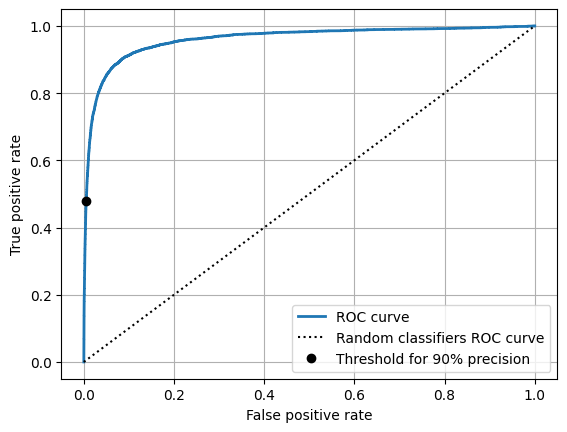

In [39]:
# use < sign since the thresholds are listed in decreasing order
idx_for_threshold_at_90 = (thresholds<= threshold_for_90_precision).argmax()

tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.plot(fpr, tpr, linewidth= 2, label= "ROC curve")
plt.plot([0,1],[0,1], "k:", label = "Random classifiers ROC curve")
plt.plot([fpr_90],[tpr_90], "ko", label = "Threshold for 90% precision")
plt.grid()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()
plt.show()


compare classifiers by measuring area under the curve. Perfect classifier has area= 1. Random classifier has area= 0.5

In [40]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

## Creating a random forest classifier  to compare with.

In [41]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state= 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv= 3, method= "predict_proba")
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [42]:
y_scores_forest = y_probas_forest[:,1]

precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

Plotting both precision recall curves

In [ ]:
plt.plot(recalls_forest, precisions_forest, "b-", linewidth= 2, label= "Random Forest")
plt.plot(recalls, precisions, "--", linewidth= 2, label= "SGD")
plt.grid()
plt.show()